## Régression Linéaire

In [8]:
import numpy as np
from numpy import *
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

### Méthode des moindre carrés

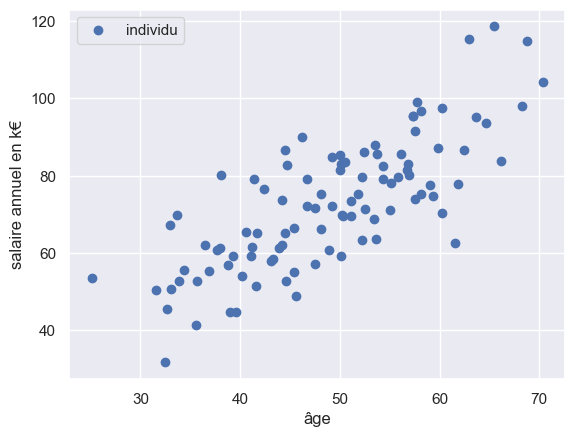

In [66]:
data = genfromtxt("data.csv", delimiter=",")

x, y = [], []
for j in data : x.append(j[0])
for j in data : y.append(j[1])

plt.scatter(x,y, label="individu")
plt.legend()
plt.xlabel("âge")
plt.ylabel("salaire annuel en k€")
plt.show()

a = 1.32243102275536 
b = 7.991020982270385


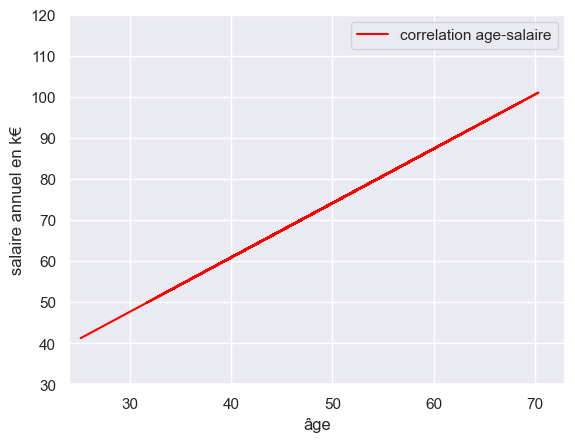

In [71]:
E_x = np.mean(x)
E_y = np.mean(y)

S1, S2 = 0, 0

for i in range(len(x)) :
    S1 += (x[i] - E_x)*(y[i] - E_y)
    S2 += (x[i] - E_x)**2
    
a = S1/S2
b = E_y - a*E_x

print("a =", a, "\nb =", b)

#plt.scatter(x,y, label="individu")
plt.plot(x, np.asarray(a)*x+b, color='red', label="correlation age-salaire")
plt.xlabel("âge")
plt.ylabel("salaire annuel en k€")
plt.ylim([30,120])
plt.xlim([24,73])
plt.legend()
plt.show()

### Comment le ferions-nous à la main ?

In [10]:
def show_reg(a,b) :
    plt.scatter(x,y, label="individu")
    plt.plot(x, np.asarray(a)*x+b, color='red', label="correlation age-salaire")
    plt.xlabel("âge")
    plt.ylabel("salaire annuel en k€")
    plt.legend()
    plt.xlim([25,70])
    plt.ylim([30,120])
    plt.show()
    
interact(show_reg, a=(-5,10,0.1), b=(-30,10));

interactive(children=(FloatSlider(value=2.0, description='a', max=10.0, min=-5.0), IntSlider(value=-10, descri…

### Visualisons plus clairement le processus qu'on fait implicitement

In [11]:
def show_error(a,b,nb_points) :
    print(len(x))
    x_tmp = x[:nb_points]
    y_tmp = y[:nb_points]
    plt.scatter(x_tmp,y_tmp, label="individu")
    plt.plot(x_tmp, np.asarray(a)*x_tmp+b, color='red', label="correlation age-salaire")
    line_list = np.asarray(a)*x_tmp + b
    plt.vlines(x_tmp, ymin=y_tmp, ymax=line_list, linestyles="dashed", colors="orange", label="distance à la droite")
    plt.xlabel("âge")
    plt.ylabel("salaire annuel en k€")
    plt.xlim([35,70])
    plt.ylim([30,120])
    plt.legend()
    plt.show()
    
interact(show_error, a=(-5,10,0.1), b=(-30,10), nb_points=(10,100));

interactive(children=(FloatSlider(value=2.0, description='a', max=10.0, min=-5.0), IntSlider(value=-10, descri…

### Introduction de la fonction d'erreur

In [20]:
def compute_error(a,b,x,y) :
    totalError = 0
    for i in range(0, len(x)):
        totalError += (y[i] - (a * x[i] + b)) ** 2
    return totalError / float(len(x))
    
def test(a, nb_points) :
    b = -10
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
    
    x_tmp = x[:nb_points]
    y_tmp = y[:nb_points]
    line_list = np.asarray(a)*x_tmp + b
    
    axes[0].scatter(x_tmp,y_tmp, label="individu")
    axes[0].plot(x_tmp, np.asarray(a)*x_tmp+b, color='red', label="correlation age-salaire")
    
    axes[0].vlines(x_tmp, ymin=y_tmp, ymax=line_list, linestyles="dashed", colors="orange", label="distance à la droite")
    axes[0].set_xlabel("âge")
    axes[0].set_ylabel("salaire annuel en k€")
    axes[0].set_xlim([35,70])
    axes[0].set_ylim([30,120])
    axes[0].legend()
    
    
    
    
    axes[1].scatter(a, compute_error(a,b,x_tmp,y_tmp), marker="+", color ="red", s=250)
    axes[1].set_xlabel("coefficeint a")
    axes[1].set_ylabel("fonction d'erreur")
    axes[1].set_xlim([0.8,2.6])
    axes[1].set_ylim([50,1200])

    plt.show()
    
interact(test, a=(0,3,0.01), nb_points=(10,100));

interactive(children=(FloatSlider(value=1.0, description='a', max=3.0, step=0.01), IntSlider(value=55, descrip…

### Visualisation de l'ensemble des valeurs pouvant être prise par la fonction d'erreur

In [19]:
a_visu = np.arange(-2,4,0.01)
b_visu = -10

def test(a, nb_points) :
    b = -10
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
    
    x_tmp = x[:nb_points]
    y_tmp = y[:nb_points]
    line_list = np.asarray(a)*x_tmp + b
    
    axes[0].scatter(x_tmp,y_tmp, label="individu")
    axes[0].plot(x_tmp, np.asarray(a)*x_tmp+b, color='red', label="correlation age-salaire")
    
    axes[0].vlines(x_tmp, ymin=y_tmp, ymax=line_list, linestyles="dashed", colors="orange", label="distance à la droite")
    axes[0].set_xlabel("âge")
    axes[0].set_ylabel("salaire annuel en k€")
    axes[0].set_xlim([35,70])
    axes[0].set_ylim([30,120])
    axes[0].legend()
    
    
    
    
    axes[1].scatter(a, compute_error(a,b,x_tmp,y_tmp), marker="+", color ="red", s=250)
    axes[1].plot(a_visu, compute_error(a_visu,b, x_tmp, y_tmp))
    axes[1].set_xlabel("coefficeint a")
    axes[1].set_ylabel("fonction d'erreur")
    axes[1].set_xlim([0.8,2.6])
    axes[1].set_ylim([50,1200])

    plt.show()
    
interact(test, a=(0,3,0.01), nb_points=(10,100));

interactive(children=(FloatSlider(value=1.0, description='a', max=3.0, step=0.01), IntSlider(value=55, descrip…

## Descente de gradient (à b fixé)

1.6760337012528763 -10


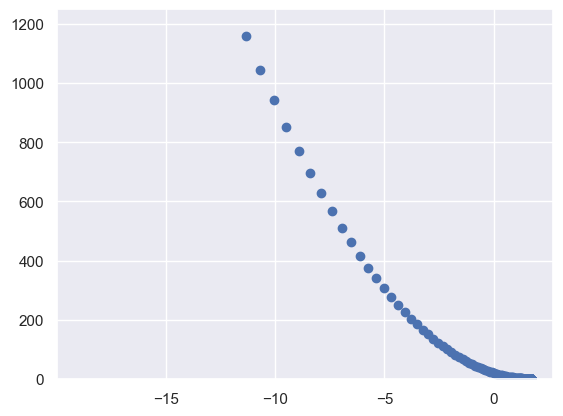

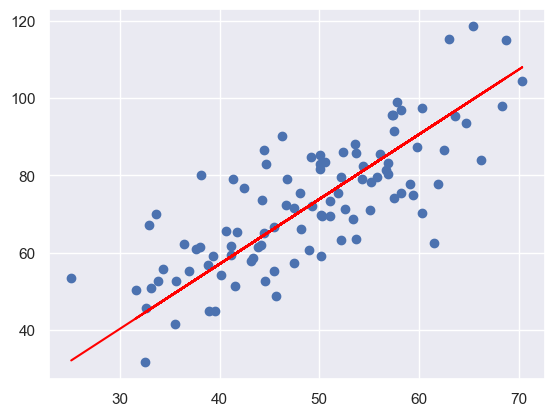

In [64]:
#Importation des données
data = genfromtxt("data.csv", delimiter=",")
x, y = [], []
for j in data : x.append(j[0])
for j in data : y.append(j[1])

#Initialisation
a = -20
b = -10

lr = 0.00001  # Learning Rate (vitesse à laquelle on réalise la descente de gradient
epochs = 1000  # nombre d'itération

n = float(len(x)) 
Da_list = []
a_list = []
err_list = []

# Performing Gradient Descent 
for i in range(epochs): 
    Y_pred = np.asarray(a)*x + b  # The current predicted value of Y
    D_a = (2/n) * sum(x * (Y_pred - y))  # Derivative wrt a
    #D_b = (-2/n) * sum(y - Y_pred)  # Derivative wrt b
    a = a - lr * D_a  # Update m
    a_list.append(a)
    Da_list.append(D_a)
    err_list.append(compute_error(a,b,x,Y_pred))
    #c = c - L * D_c  # Update c
    
print (a,b)

plt.scatter(a_list, err_list)
plt.ylim([0,1250])
plt.show()

plt.scatter(x,y, label="individu")
plt.plot(x, np.asarray(a)*x+b, color='red', label="correlation age-salaire")